## 명암 조절

In [ ]:
import cv2 as cv
import numpy as np

img = cv.imread('soccer.jpg')
img = cv.resize(img, dsize=(0,0), fx=0.25, fy=0.25)

def gamma(f, gamma = 1.0):
    f1 = f / 255.0 # Normalize the pixel values to [0, 1]
    print(type(f1[0,0,0])) # Check the type of the pixel value
    return np.uint8(255 * (f1 ** gamma)) # Apply gamma correction

gc = np.hstack((gamma(img, 0.5),
                gamma(img, 0.75),
                gamma(img, 1.0),
                gamma(img, 2.0),
                gamma(img, 3.0)))

cv.imshow('Gamma Correction', gc)
cv.waitKey(0)
cv.destroyAllWindows()

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


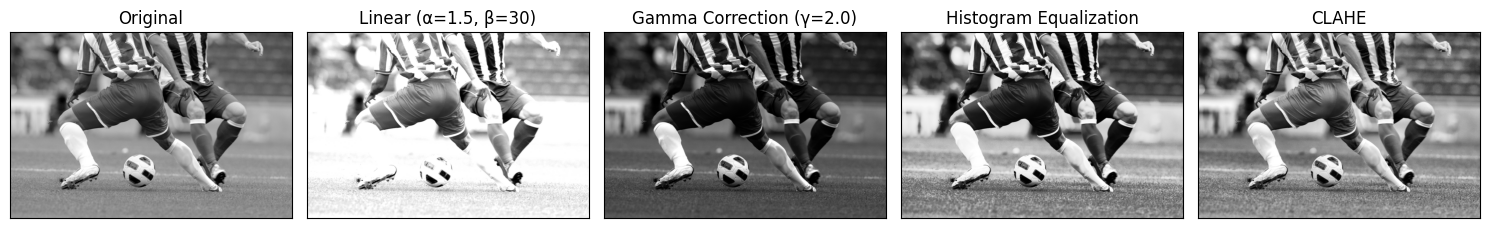

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기 (흑백)
img = cv.imread('soccer.jpg', cv.IMREAD_GRAYSCALE)
if img is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# ------------------------------
# 선형 연산 (alpha, beta)
# ------------------------------
alpha = 1.5   # 대비 조절
beta = 30     # 밝기 조절
linear = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# ------------------------------
# 감마 보정
# ------------------------------
gamma_value = 2.0  # 1보다 크면 어두워짐, 1보다 작으면 밝아짐
f = img / 255.0
gamma_corrected = np.uint8(255 * (f ** gamma_value))

# ------------------------------
# 히스토그램 평활화
# ------------------------------
hist_eq = cv.equalizeHist(img)

# ------------------------------
# CLAHE
# ------------------------------
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

# ------------------------------
# 시각화
# ------------------------------
titles = ['Original', f'Linear (α={alpha}, β={beta})',
          f'Gamma Correction (γ={gamma_value})',
          'Histogram Equalization', 'CLAHE']

images = [img, linear, gamma_corrected, hist_eq, clahe_img]

plt.figure(figsize=(15, 5))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


| 기법                 | 특징          | 장점          | 단점            |
| ------------------ | ----------- | ----------- | ------------- |
| 선형 연산 (alpha/beta) | 직선 이동       | 쉽고 빠름       | 대비 조절 한계      |
| 감마 보정              | 비선형 곡선      | 눈에 자연스럽게    | 감마값 적절히 선택 필요 |
| 히스토그램 평활화          | 픽셀 분포 재분배   | 전체 대비 향상    | 과도하면 노이즈도 강조됨 |
| CLAHE              | 국부 평활화 + 제한 | 작은 영역 대비 향상 | 파라미터 튜닝 필요    |